In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import missingno
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

## Analyse de Fond :
- **Visualisation de la target** : 
    
    
- **Signification des variables** :



- **Relation Variables / Target** :
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :


- **NaN analyse** :


In [ ]:
data = pd.read_csv("./../dataset_nettoyer_3.csv", 
                   low_memory=False,  
                   encoding='utf-8')
data.info()

<AxesSubplot:>

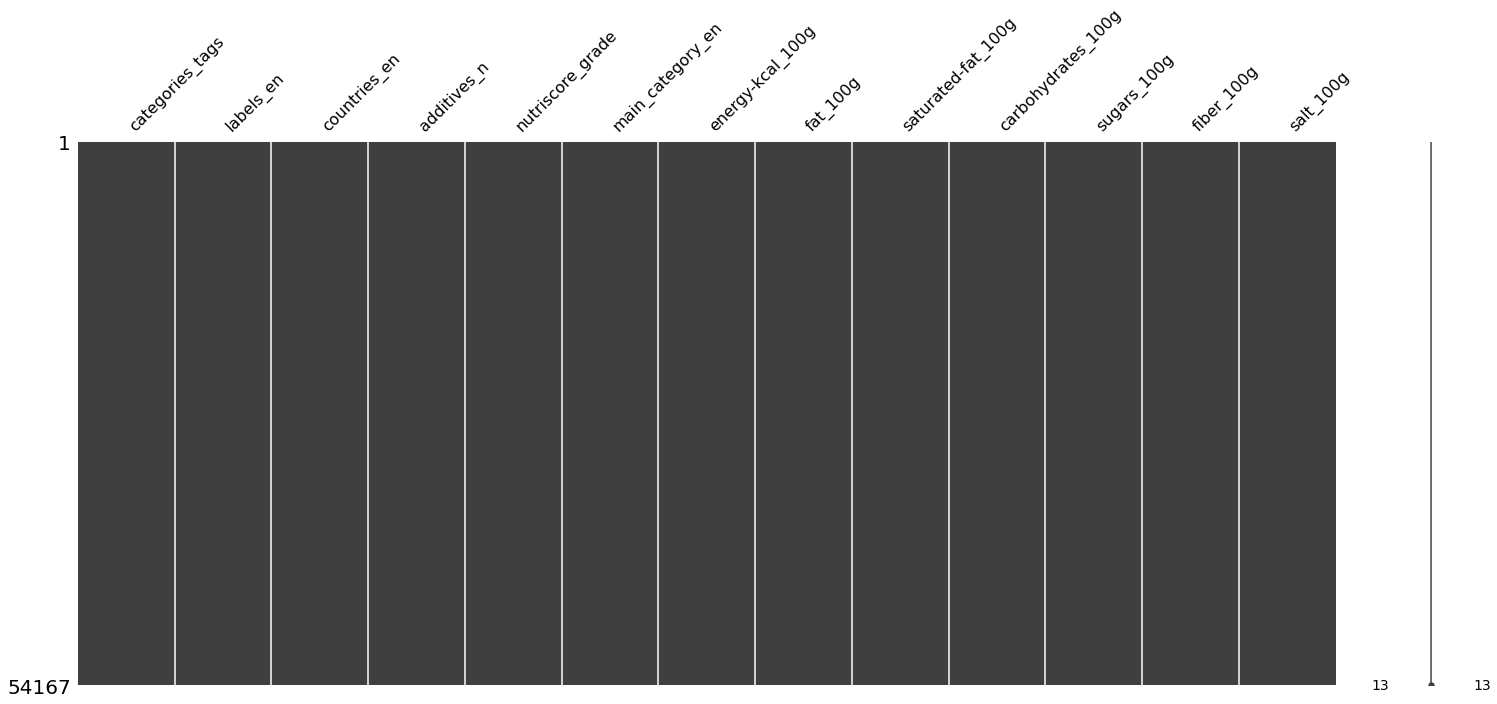

In [5]:
missingno.matrix(data)

# Visualisation univarié

In [6]:
data.nunique()

categories_tags       3513
labels_en             6533
countries_en           860
additives_n             21
nutriscore_grade         5
main_category_en        19
energy-kcal_100g      1457
fat_100g              1414
saturated-fat_100g    1136
carbohydrates_100g    2647
sugars_100g           2380
fiber_100g             400
salt_100g             2307
dtype: int64

## Variable qualitatives 

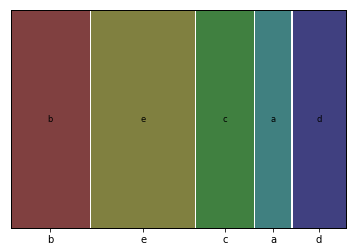

In [7]:
mosaic(data,['nutriscore_grade'])
plt.show()

<AxesSubplot:xlabel='nutriscore_grade'>

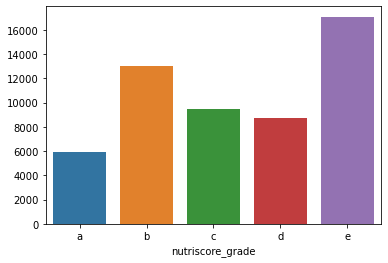

In [8]:
result = data.groupby(['nutriscore_grade']).size()
  
sns.barplot(x = result.index, y = result.values)

<AxesSubplot:ylabel='nutriscore_grade'>

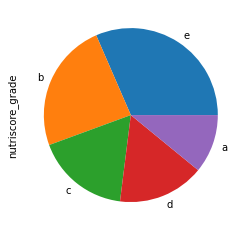

In [9]:
data["nutriscore_grade"].value_counts(normalize=True).plot(kind='pie')

In [10]:
data.describe()

,additives_n,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g
count,54167.000000,54167.000000,54167.000000,54167.000000,54167.000000,54167.000000,54167.000000,54167.000000
mean,0.666421,101.365717,4.164411,2.371035,14.295459,11.961075,0.378124,0.319581
std,1.916131,145.129547,9.630861,5.854710,18.920227,16.488903,2.049607,4.404408
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.417000,0.000000
25%,-1.000000,36.000000,0.000000,0.000000,4.700000,4.100000,0.000000,0.002500
50%,0.000000,47.000000,0.400000,0.090000,8.900000,7.400000,0.000000,0.050000
75%,1.000000,67.000000,2.080000,1.000000,12.080000,11.000000,0.000000,0.130000
max,20.000000,1962.000000,100.000000,100.000000,105.000000,103.500000,100.000000,550.000000


--------------------
additives_n
moy:
 0.6664205143352964
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 3.6714891404988004
ect:
 1.9161130291553263
skw:
 1.8943737732702854
kur:
 4.48975570092508


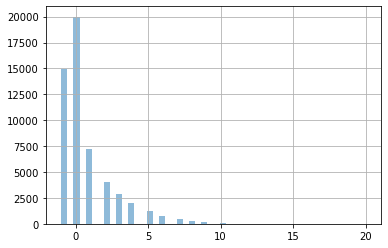

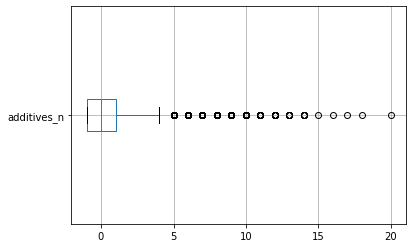

--------------------
energy-kcal_100g
moy:
 101.36571655295779
med:
 47.0
mod:
 0    47.0
dtype: float64
var:
 21062.196620551214
ect:
 145.12820752889914
skw:
 2.4573057362397863
kur:
 6.81609440780338


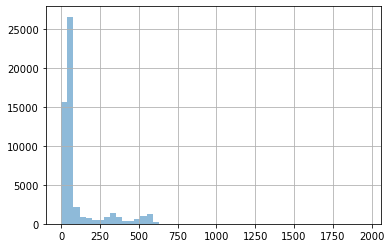

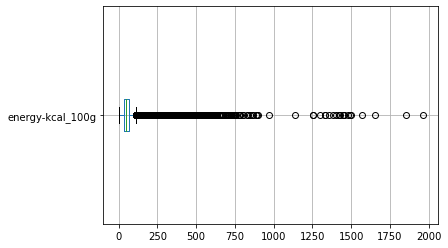

--------------------
fat_100g
moy:
 4.16441134061617
med:
 0.4
mod:
 0    0.0
dtype: float64
var:
 92.75176229976817
ect:
 9.630771635739691
skw:
 2.86321244836037
kur:
 7.852877665645611


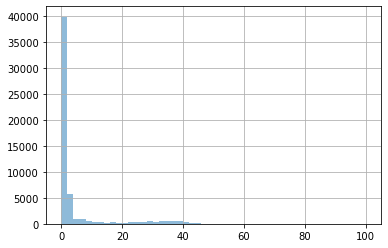

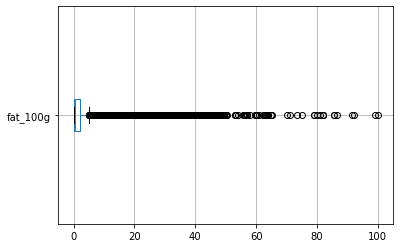

--------------------
saturated-fat_100g
moy:
 2.3710351473640103
med:
 0.09
mod:
 0    0.0
dtype: float64
var:
 34.27699993451793
ect:
 5.854656261004393
skw:
 3.098788612561325
kur:
 11.406579219411883


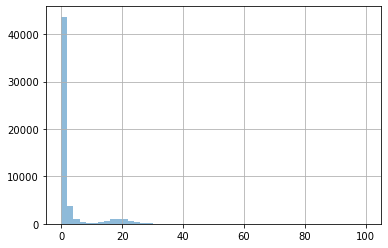

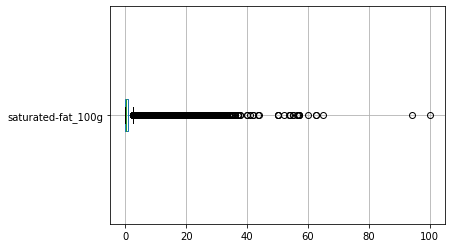

--------------------
carbohydrates_100g
moy:
 14.295459381178796
med:
 8.9
mod:
 0    0.0
dtype: float64
var:
 357.96836921736696
ect:
 18.92005204055652
skw:
 2.3142160898001056
kur:
 4.604753349194876


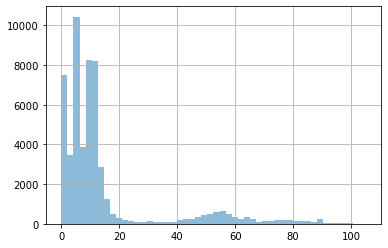

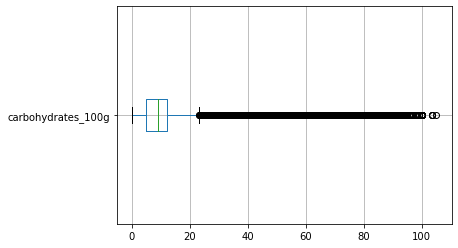

--------------------
sugars_100g
moy:
 11.961075479085212
med:
 7.4000000953674
mod:
 0    0.0
dtype: float64
var:
 271.87889354649934
ect:
 16.488750515017788
skw:
 2.6165238629816936
kur:
 6.578402291685602


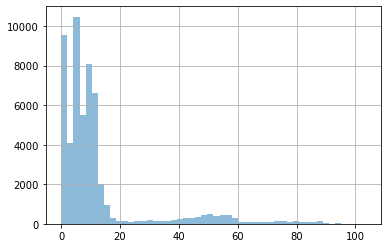

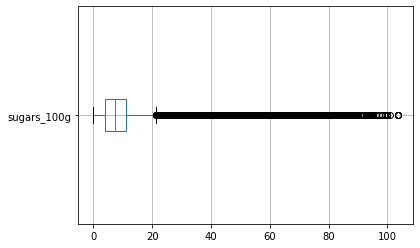

--------------------
fiber_100g
moy:
 0.3781244952342075
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 4.200811311923318
ect:
 2.049588083475145
skw:
 19.1108144407565
kur:
 570.2041523081158


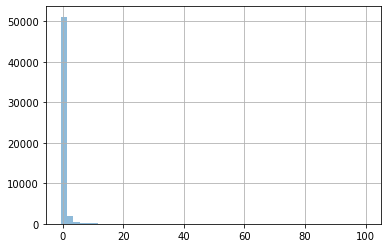

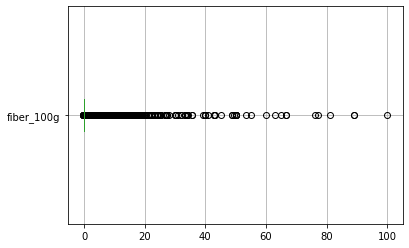

--------------------
salt_100g
moy:
 0.3195814271580655
med:
 0.05
mod:
 0    0.0
dtype: float64
var:
 19.398450849924313
ect:
 4.4043672473948305
skw:
 71.62494923473872
kur:
 7211.405282335578


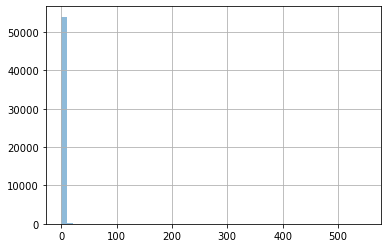

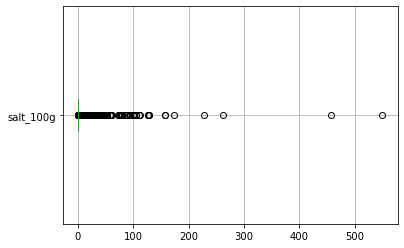

In [11]:
kwargs = dict(alpha=0.5, bins=50)
for column in data.select_dtypes(exclude='object'):
    print("-"*20)
    print(column)
    print("moy:\n",data[column].mean())
    print("med:\n",data[column].median())
    print("mod:\n",data[column].mode())
    print("var:\n",data[column].var(ddof=0))
    print("ect:\n",data[column].std(ddof=0))
    print("skw:\n",data[column].skew())
    print("kur:\n",data[column].kurtosis())
    data[column].hist(**kwargs)
    plt.show()
    data.boxplot(column=column, vert=False)
    plt.show()

# Représentation graphique 2 variable

## boxplot pour le nutriscore par variable quantitatives

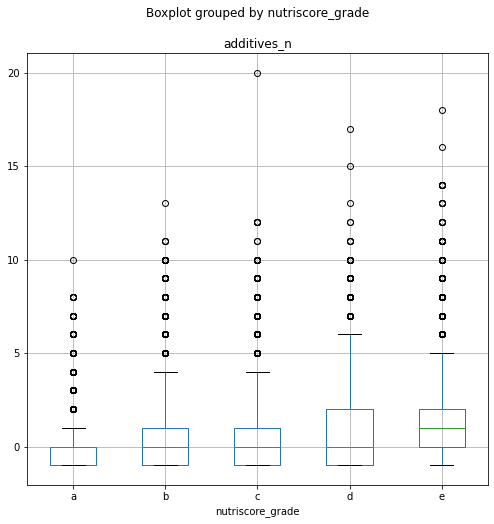

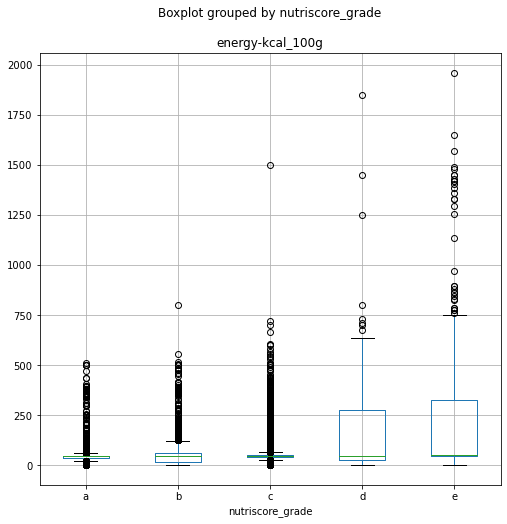

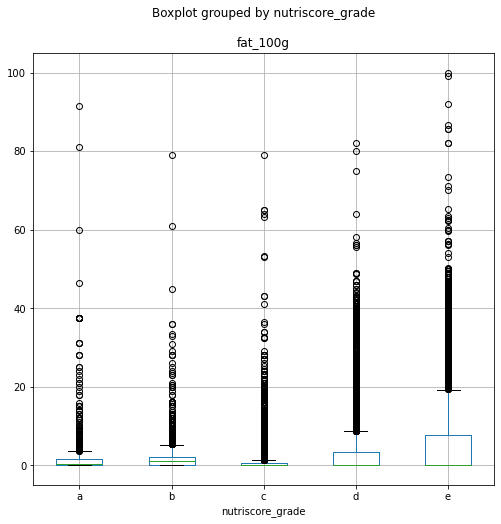

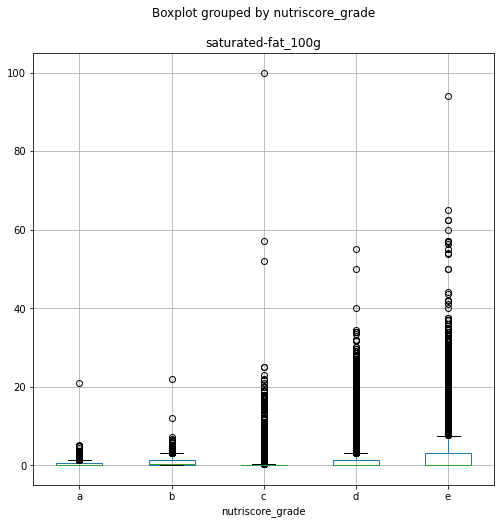

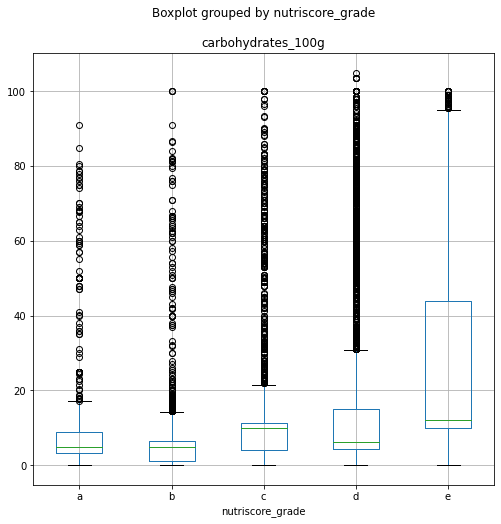

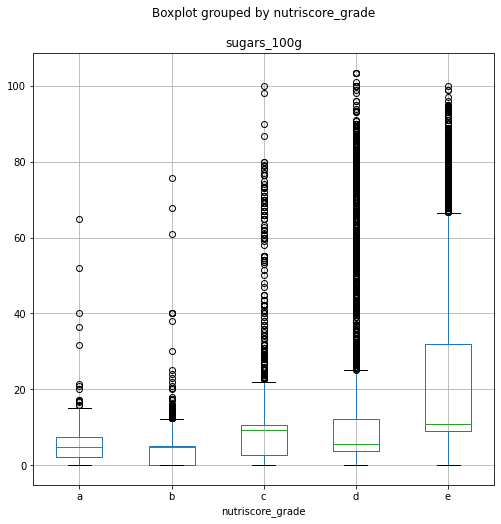

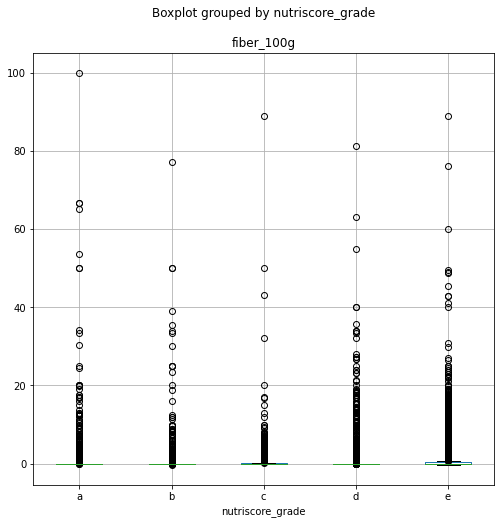

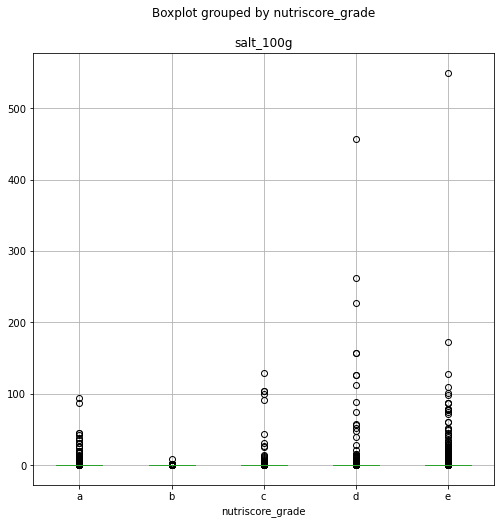

In [13]:
for column in data.select_dtypes(exclude = 'object'):
    data.boxplot(column=column,
                 by= "nutriscore_grade",
                 figsize= (8,8)) 

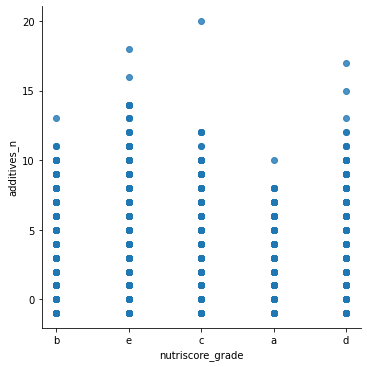

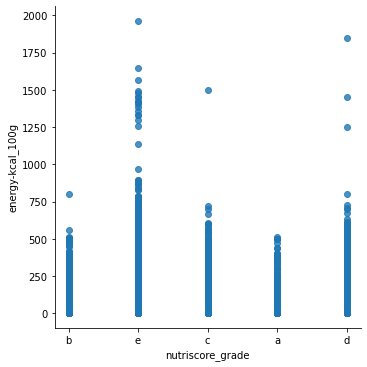

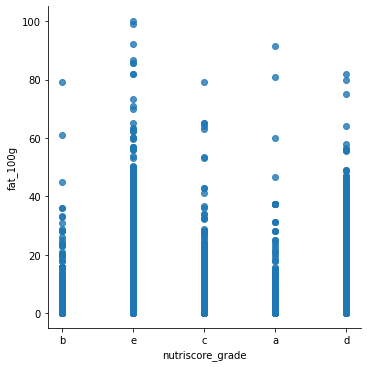

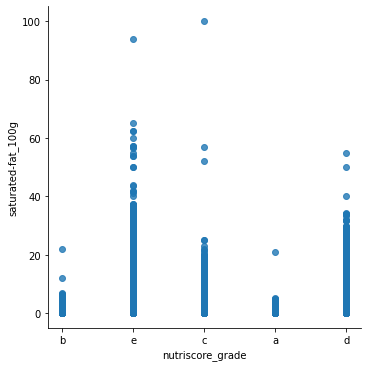

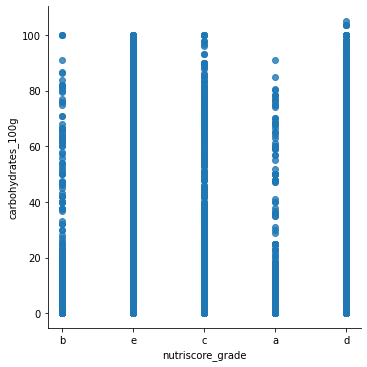

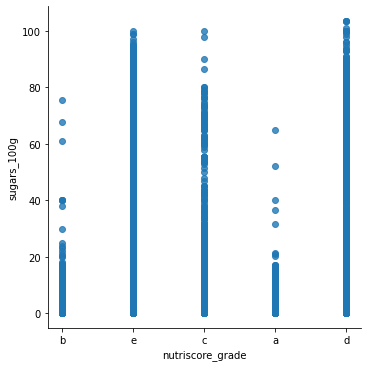

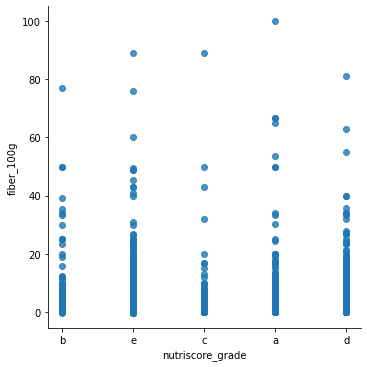

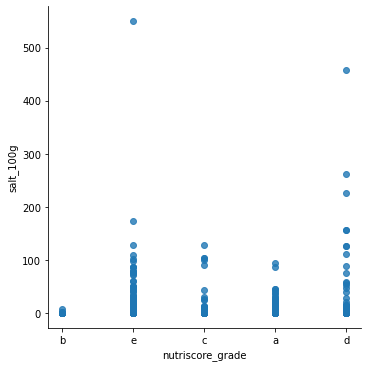

In [24]:
for column in data.select_dtypes(exclude = 'object'):
    facet = sns.lmplot(data=data, x='nutriscore_grade', y=column, 
                       fit_reg=False, legend=True, legend_out=True)

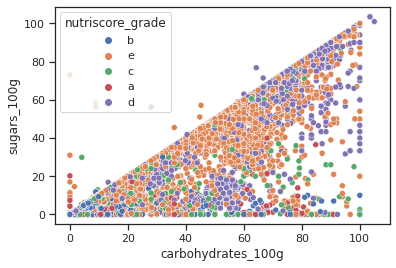

In [59]:
 p4a_i = sns.scatterplot("carbohydrates_100g",
                         "sugars_100g",
                         hue="nutriscore_grade",
                         data=data);

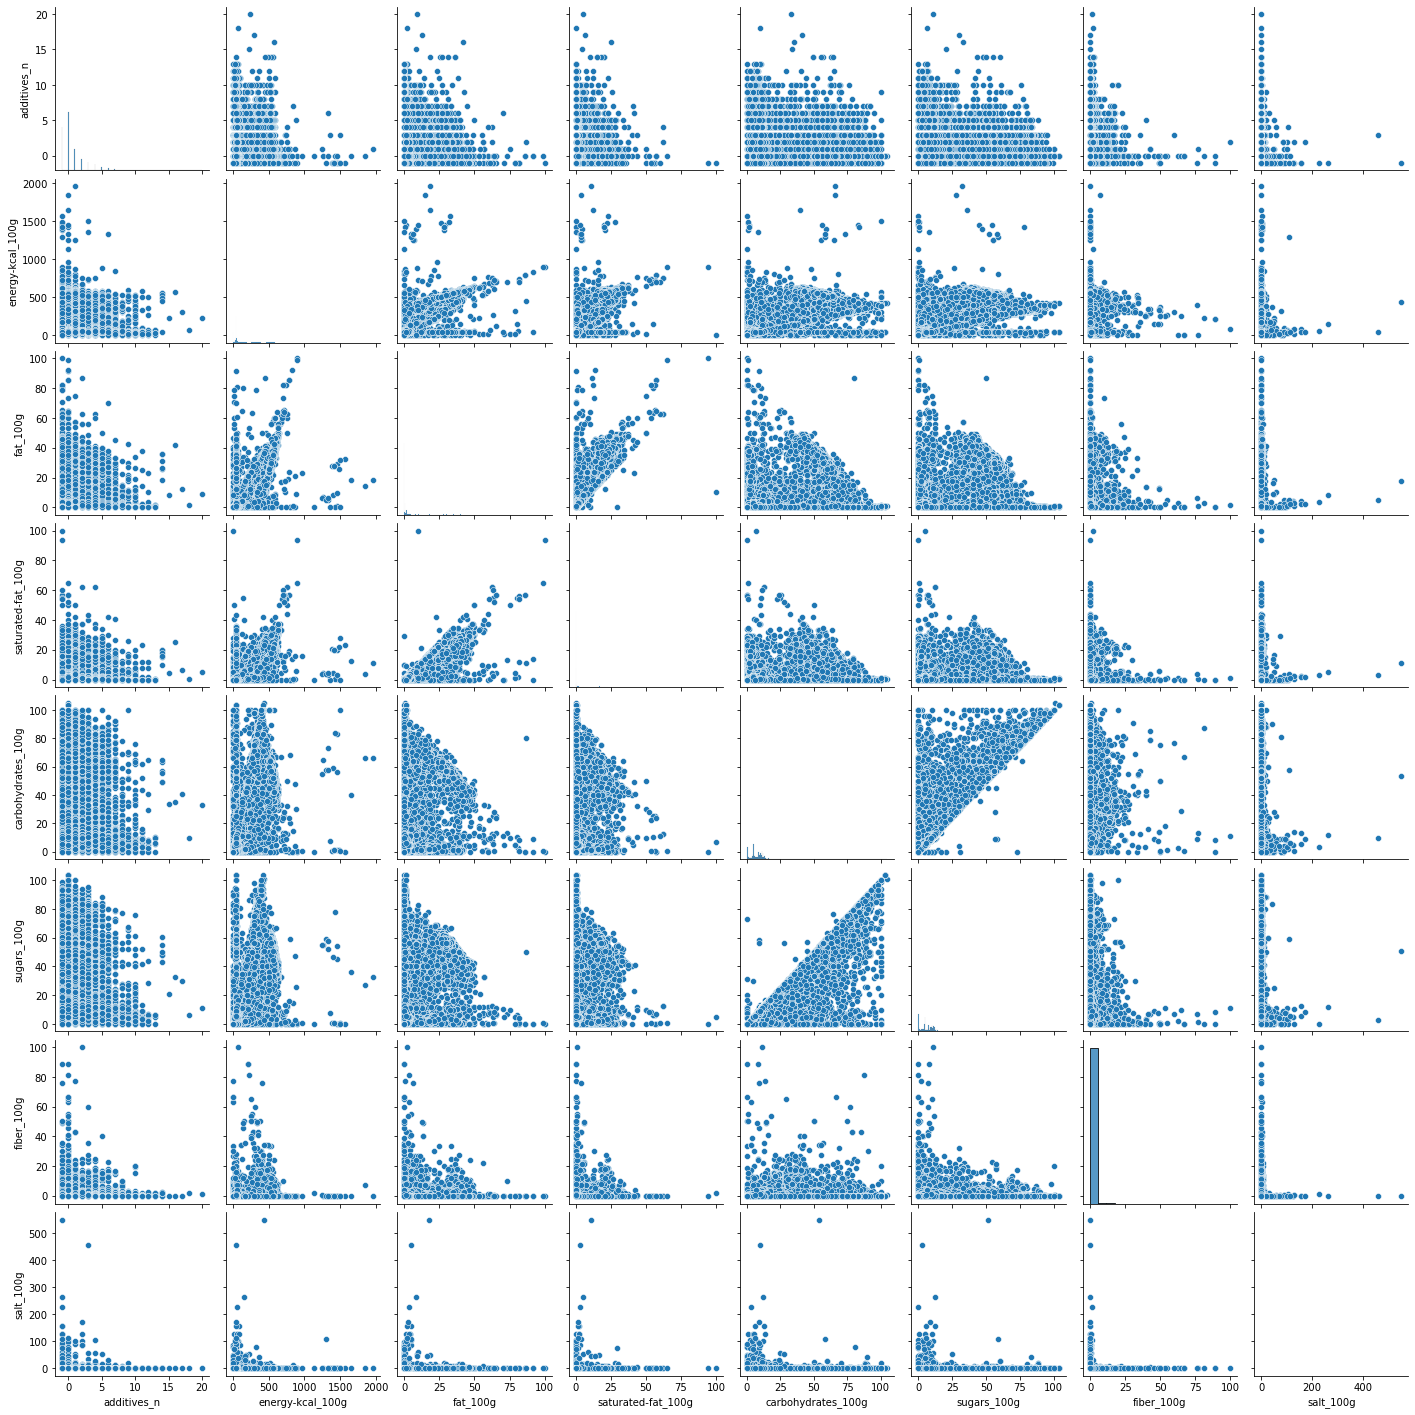

In [45]:
sns.pairplot(data)

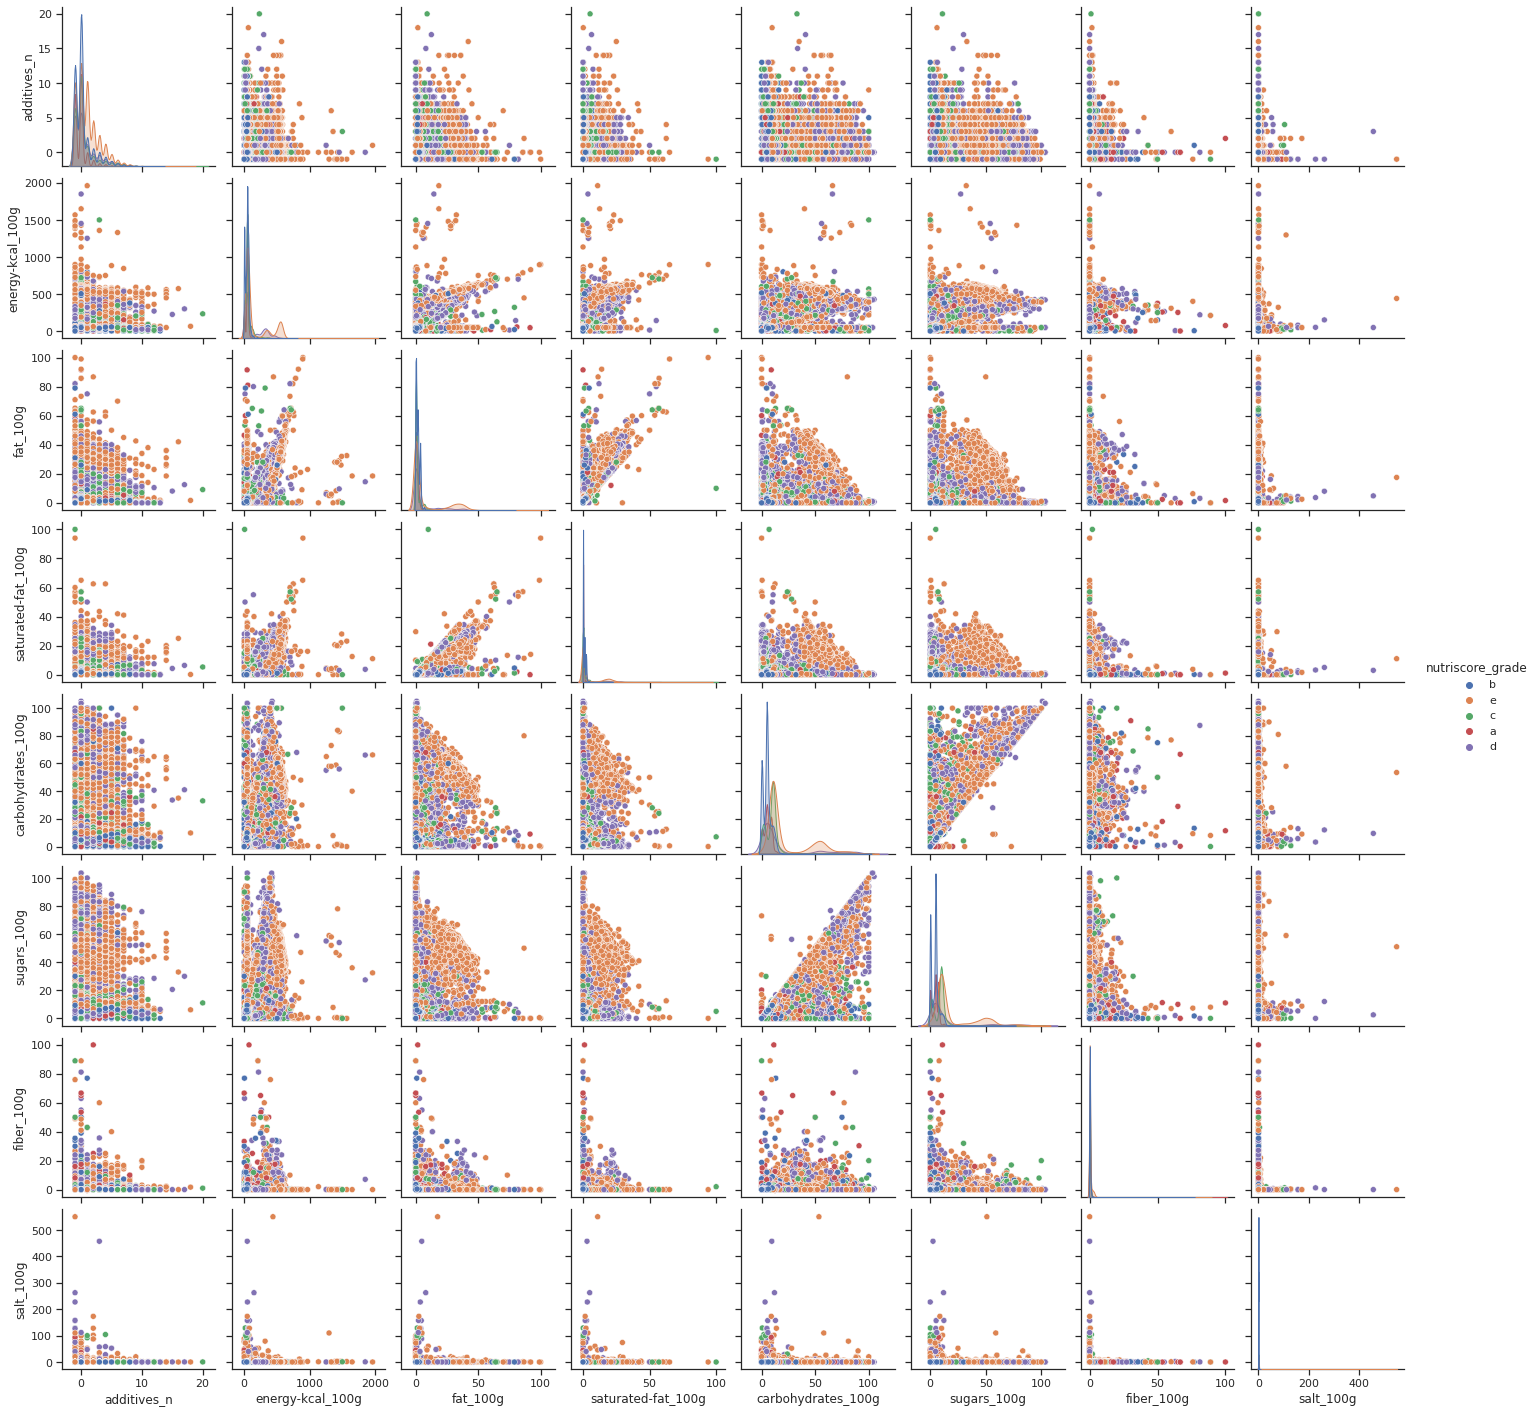

In [57]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue='nutriscore_grade')

## Matrice de correlation

Correlation de pearson entre les variables quantitatives

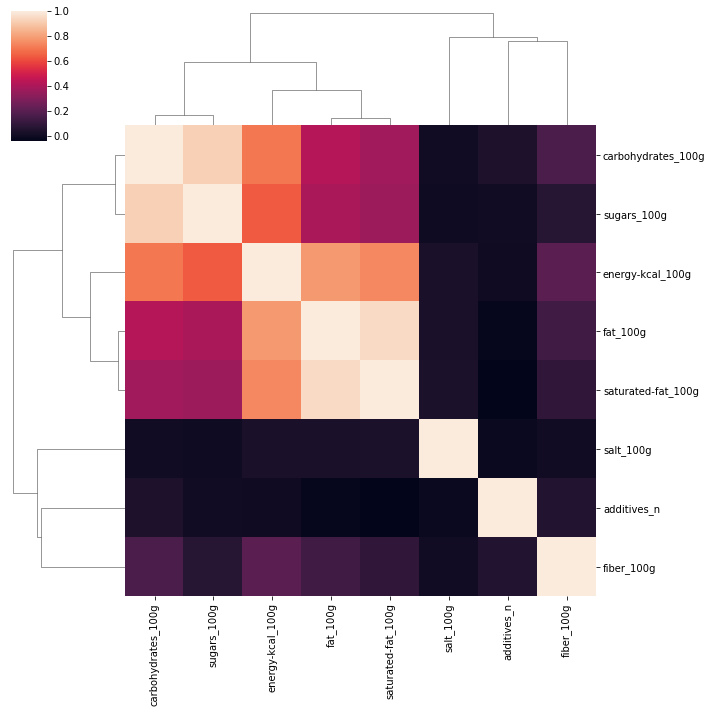

In [46]:
sns.clustermap(data.corr())

<AxesSubplot:>

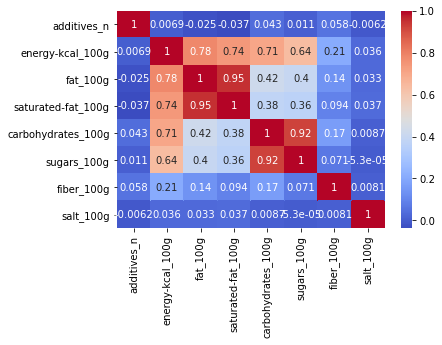

In [47]:
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# PCA

In [60]:
from functions import *

In [61]:
data.columns.values

array(['categories_tags', 'labels_en', 'countries_en', 'additives_n',
       'nutriscore_grade', 'main_category_en', 'energy-kcal_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'salt_100g'], dtype=object)

In [68]:
X = data[['energy-kcal_100g', 'fat_100g', 
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
       'salt_100g']]
X.head()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g
0,221.0,0.5,0.1000,0.01,0.01,0.0,0.0100
1,48.0,0.0,0.0000,13.30,12.70,0.0,0.0500
2,4.0,0.1,0.1000,0.10,0.10,0.0,0.0010
3,47.0,0.0,0.0000,10.40,10.40,0.0,0.0254
4,43.0,0.1,0.0001,10.70,10.70,0.0,0.0000


In [69]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.82433515, -0.3804899 , -0.38790239, ..., -0.72480177,
        -0.18448804, -0.07028965],
       [-0.3677143 , -0.43240682, -0.40498281, ...,  0.04481386,
        -0.18448804, -0.06120775],
       [-0.6708945 , -0.42202344, -0.38790239, ..., -0.7193435 ,
        -0.18448804, -0.07233308],
       ...,
       [-0.69845634, -0.43240682, -0.40498281, ..., -0.72540824,
        -0.18448804, -0.06688394],
       [-0.43661889, -0.32338129, -0.40498281, ..., -0.36698205,
         0.01067312, -0.03680016],
       [ 3.15331038,  3.20177758,  3.18190582, ...,  2.36760963,
        -0.18448804, -0.0226097 ]])

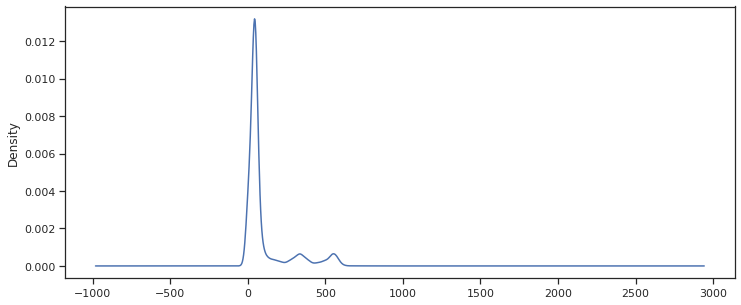

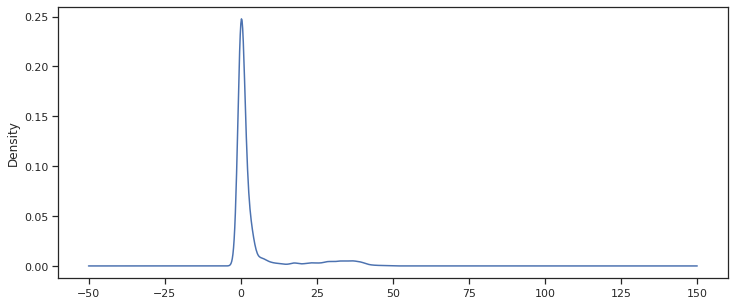

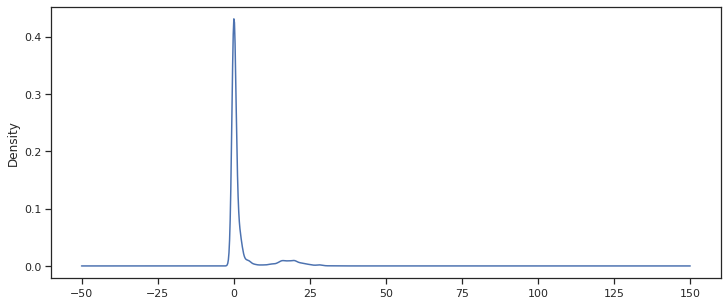

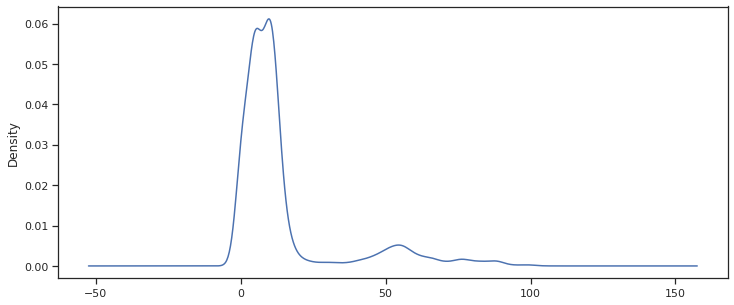

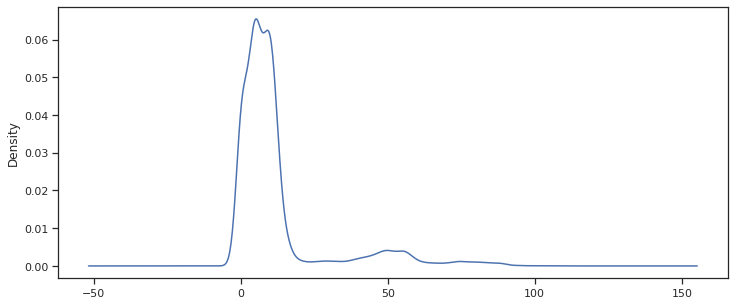

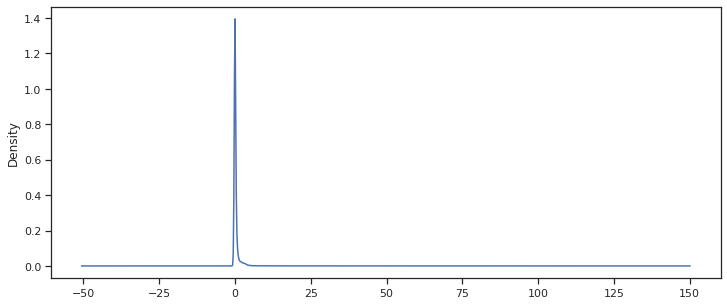

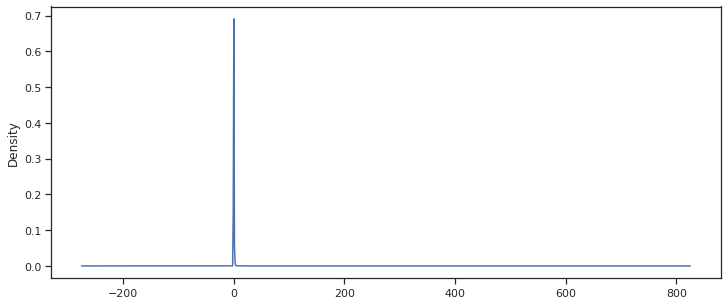

In [70]:
X1 = pd.DataFrame(X,columns=X.columns)
for column in X1:
    X1[column].plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
    plt.show()

<AxesSubplot:ylabel='Density'>

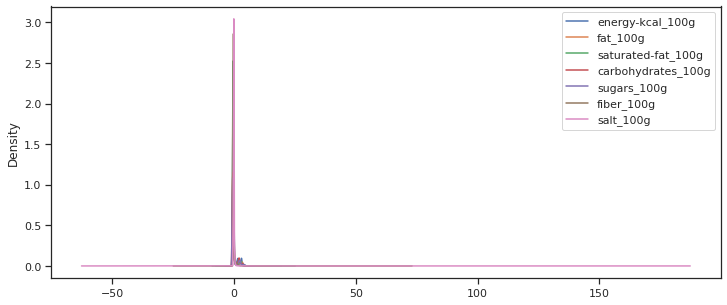

In [71]:
pd.DataFrame(X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

In [73]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 7

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)

PCA(n_components=7)

## Analyse the results

### Explained Variance Ratio

In [74]:
pca.explained_variance_ratio_

array([0.51058432, 0.16653164, 0.14203882, 0.13904144, 0.02608964,
       0.00932536, 0.00638879])

In [75]:
pca.explained_variance_ratio_.cumsum()

array([0.51058432, 0.67711596, 0.81915477, 0.95819621, 0.98428585,
       0.99361121, 1.        ])

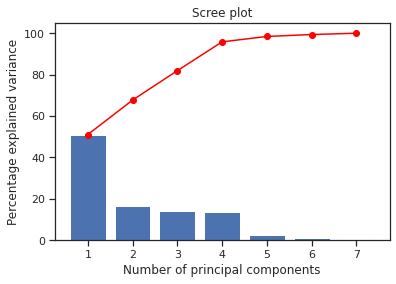

In [76]:
display_scree_plot(pca)

### Component Scores

In [82]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]
pc5 = pca.components_[4]
pc6 = pca.components_[5]

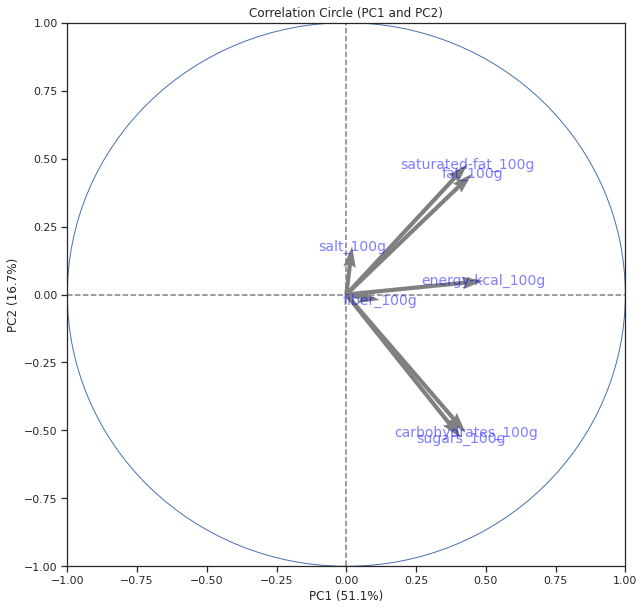

In [94]:
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(X.columns),)

### Individuals Factor Map

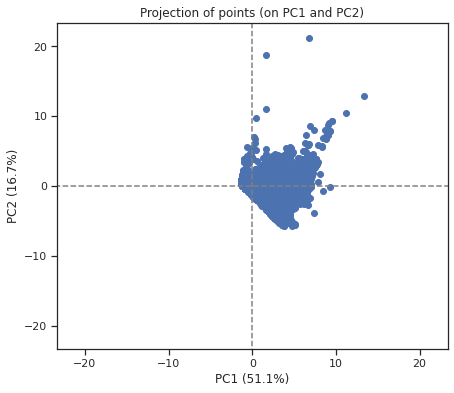

In [95]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(X_scaled) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 7

# import de l'échantillon

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[['energy-kcal_100g', 'fat_100g', 
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
       'salt_100g']]
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
Y = data_pca.values
names = data["nutriscore_grade"] # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
Y_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(Y_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
Y_projected = pca.transform(Y_scaled)
display_factorial_planes(Y_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

# Test Chi-2

In [ ]:
Hypothése H0: Le nutriscore_grade est indépandant de la catégorie de boisson

## Category et nutriscore

### Tableau de contingence

In [133]:
crosstab = pd.crosstab(data["main_category_en"], data["nutriscore_grade"])

crosstab

nutriscore_grade,a,b,c,d,e
main_category_en,,,,,
Artificially sweetened beverages,1,130,157,164,131
Beverages,0,998,1050,1125,3669
Beverages with cranberry,0,0,14,7,21
Beverages with orange,0,3,8,8,21
Dehydrated beverages,0,0,0,0,1
Diet beverages,1,8,6,9,1
Hot beverages,1,15,7,7,18
Instant beverages,0,1,0,1,3
Sweetened beverages,33,309,271,1185,3459


### Test indépendance

In [134]:
c, p, dof, expected = chi2_contingency(crosstab)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


## Label et nutriscore

### Tableau de contingence

In [136]:
crosstab2 = pd.crosstab(data["labels_en"], data["nutriscore_grade"])

crosstab2

nutriscore_grade,a,b,c,d,e
labels_en,,,,,
0,3937,7339,5376,5265,11247
1,0,1,0,0,0
"1% for the planet,FSC,FSC Mix,fr:fsc-c020428",0,0,1,0,0
"100% muscle,FSC,Fsc-c014047,Green Dot,No colorings,No preservatives",0,0,1,0,0
100% natural,0,9,1,3,6
...,...,...,...,...,...
zh:cns-3056,0,1,0,0,0
zh:tqf,0,0,1,0,0
Газирана,1,0,0,0,0


In [137]:
c, p, dof, expected = chi2_contingency(crosstab2)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 6.227202998484462e-247
Dependent (reject H0)


# ANOVA

In [ ]:
H0: la moyenne de 1 ingrédient pour chaque nutriscore sont =

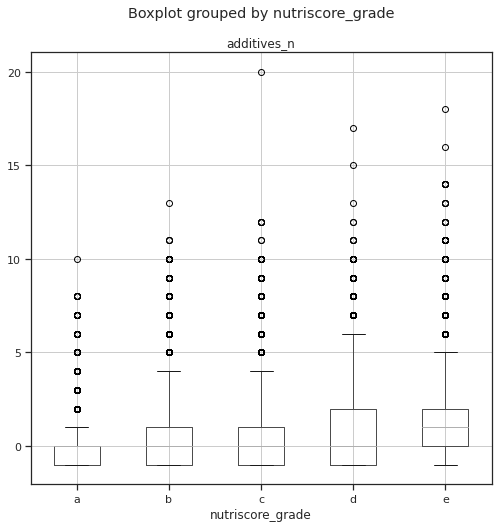

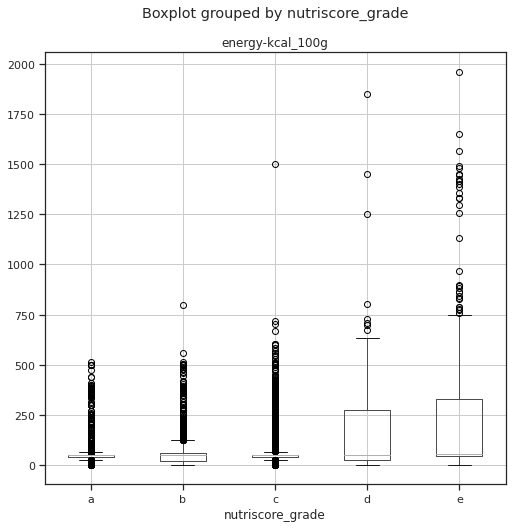

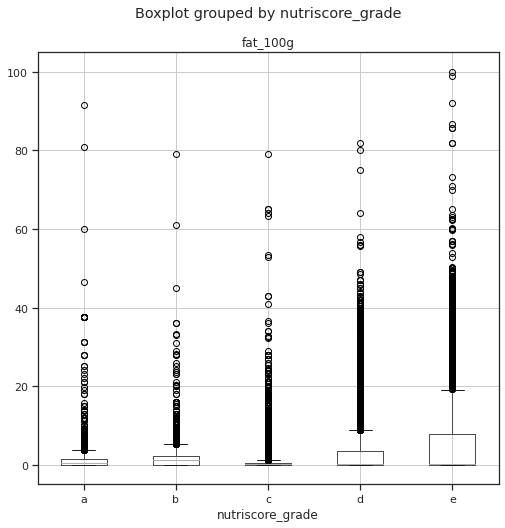

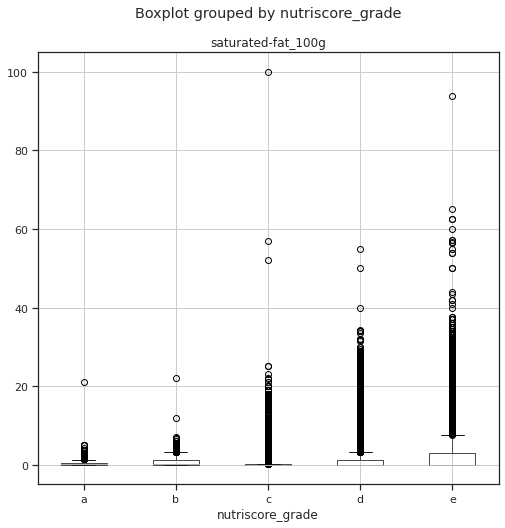

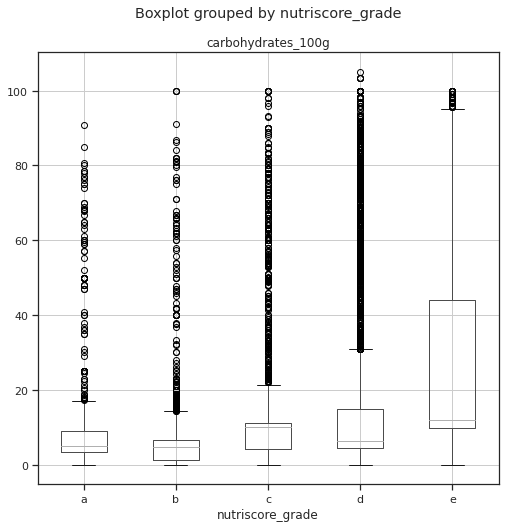

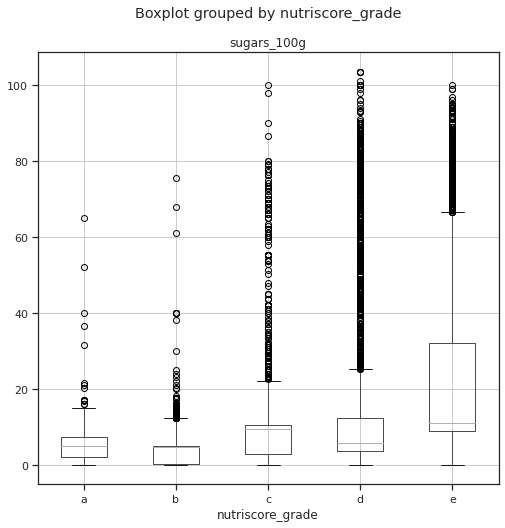

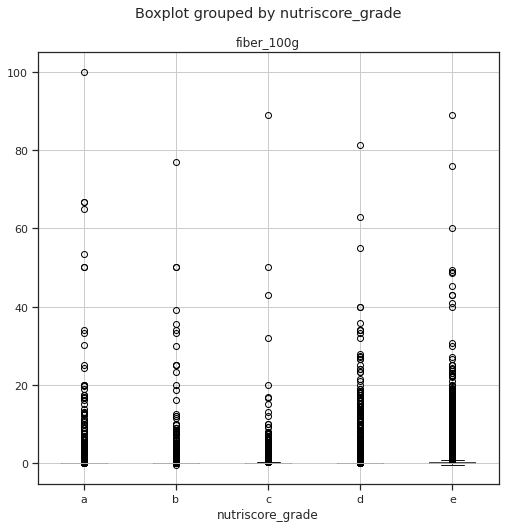

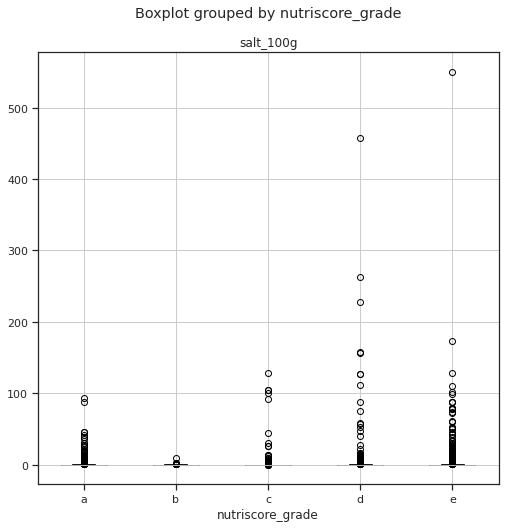

In [143]:
for column in data.select_dtypes(exclude = 'object'):
    data.boxplot(column=column,
                 by= "nutriscore_grade",
                 figsize= (8,8)) 

In [145]:
data.head()

,categories_tags,labels_en,countries_en,additives_n,nutriscore_grade,main_category_en,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g
0,"en:plant-based-foods-and-beverages,en:beverage...",0,France,-1.0,b,juices,221.0,0.5,0.1000,0.01,0.01,0.0,0.0100
1,en:beverages,0,France,0.0,e,Beverages,48.0,0.0,0.0000,13.30,12.70,0.0,0.0500
2,en:beverages,0,France,0.0,c,Beverages,4.0,0.1,0.1000,0.10,0.10,0.0,0.0010
3,"en:beverages,en:carbonated-drinks,en:sodas,en:...",0,France,2.0,e,Sweetened beverages,47.0,0.0,0.0000,10.40,10.40,0.0,0.0254
4,"en:beverages,en:sweetened-beverages",0,France,1.0,e,Sweetened beverages,43.0,0.1,0.0001,10.70,10.70,0.0,0.0000


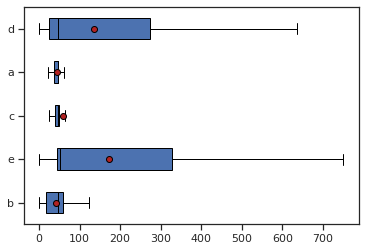

In [150]:
X = "nutriscore_grade" # qualitative
Y = "energy-kcal_100g" # quantitative

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [149]:
X = "nutriscore_grade" # qualitative
Y = "energy-kcal_100g" # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data[X],data[Y])

0.1565873386066205